<a href="https://colab.research.google.com/github/anamarijaeres/Analysis-of-the-Relationship-between-Movie-Titles-and-Corresponding-Ratings-and-Reviews/blob/main/4_2_1_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**
**This is a sentiment analysis program for movie reviews from IMDB**



> Here is the link to database: https://data.mendeley.com/datasets/38j8b6s2mx/1 -> You need to put it on your Drive and adjust the ***PATH***





In [ ]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import zipfile
import io
import os 
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
dataset = "/gdrive/My Drive/dataset_movies/IMDB_reviews_dataset/"
movie_names = ["2012", "A Beautiful Mind", "Amadeus", "Avatar", "Clash of the Titans", "Les Miserables", "Star Wars Episode I - The Phantom Menace", "The Expendables I", "The Godfather", "The Matrix Revolutions"]

def edit_rating_input(rating):
  rating = rating.replace("[", '')
  rating = rating.replace("]", '')
  rating = rating.replace("rating", '')
  rating = rating.replace("rating", '')
  rating = rating.replace("=", '')
  rating = rating.replace(' ', '')
  rating_array = rating.split(",")
  return rating_array

def edit_rating_input_polarity(rating):
  rating = rating.replace("[", '')
  rating = rating.replace("]", '')
  rating = rating.replace("polarity", '')
  rating = rating.replace("polarity", '')
  rating = rating.replace("=", '')
  rating = rating.replace(' ', '')
  rating_array = rating.split(",")
  return rating_array

reviews_2012 = []
reviews = []
ratings = []
polaritys = []
for j in range(10):
  for i in range(1,101):
    with open(dataset + movie_names[j] + "/" + str(i) +".txt", 'r') as f:
      reviews.append(f.read())
  rating = ''
  with open(dataset + movie_names[j] + "/" + "rating.txt", 'r') as r:
    rating = str(r.read())
    rating_array = edit_rating_input(rating)
    ratings = ratings + rating_array
  with open(dataset + movie_names[j] + "/" + "polarity.txt", 'r') as g:
    polarity = str(g.read())
    polarity_array = edit_rating_input_polarity(polarity)
    polaritys = polaritys + polarity_array

print("Rating:", ratings)
print("Polarity:", polaritys)


df_array = []
for i in range(len(reviews)):
  new_array = [reviews[i], ratings[i]]
  print(i , ')', new_array)
  print()
  df_array.append(new_array)




Mounted at /gdrive
Rating: ['9', '10', '3', '10', '4', '7', '1', '6', '2', '9', '4', '7', '6', '10', '9', '8', '9', '4', '6', '7', '7', '1', '5', '7', '3', '10', '5', '3', '1', '8', '4', '1', '10', '1', '8', '1', '5', '6', '4', '4', '10', '8', '5', '1', '7', '3', '1', '2', '6', '2', '10', '3', '1', '2', '8', '6', '5', '10', '10', '4', '1', '10', '7', '6', '1', '10', '2', '7', '5', '1', '9', '8', '5', '1', '9', '4', '3', '3', '8', '6', '6', '7', '10', '7', '9', '9', '6', '9', '7', '9', '4', '8', '2', '8', '6', '7', '7', '5', '9', '10', '8', '8', '10', '10', '7', '10', '6', '8', '8', '8', '9', '8', '8', '6', '8', '10', '8', '3', '9', '10', '9', '9', '8', '10', '9', '9', '10', '6', '9', '7', '8', '10', '9', '2', '8', '10', '9', '10', '9', '9', '10', '7', '4', '10', '9', '10', '9', '6', '7', '7', '6', '10', '7', '6', '10', '7', '8', '9', '9', '8', '1', '5', '9', '7', '9', '10', '10', '8', '9', '9', '8', '9', '9', '7', '9', '9', '9', '5', '8', '8', '6', '10', '10', '10', '8', '10', '5', '10

In [ ]:
# Create a dataframe with a columns = REVIEW, POLARITY, RATING
review = ''
df = pd.DataFrame(df_array, columns = ['Reviews', 'Rating'])
#df = pd.DataFrame([review for r in reviews_2012], columns=['Reviews'])
df

,Reviews,Rating
0,I have to say this movie is very tense. The di...,9
1,2012 (2009) is a science fiction film disaste...,10
2,I like John Cusack. He usually makes some pre...,3
3,LMAO!!!!! Are you some kind of boring 90 year ...,10
4,When I thought about all the hoopla that surro...,4
...,...,...
995,"Picking up right we left in Reloaded, the mach...",8
996,Is Revolutions perfect? No. Does it come close...,9
997,"I'm very angry. Not at Revolutions, at you! Yo...",9
998,"As the trilogy came to an close, the viewers w...",9


In [ ]:
# Clean the text

# Function cleanText that returns text without unnesessery words
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #r tells Python expression is a raw string
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)

  return text

# Cleaning the text
df['Reviews'] = df['Reviews'].apply(cleanText)

# Show the cleaned text
df.head()

,Reviews,Rating
0,I have to say this movie is very tense. The di...,9
1,2012 (2009) is a science fiction film disaste...,10
2,I like John Cusack. He usually makes some pre...,3
3,LMAO!!!!! Are you some kind of boring 90 year ...,10
4,When I thought about all the hoopla that surro...,4


In [ ]:
# Function for getting subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# polarity ustvari već imam... mogu usporediti s njihovim
# Function for getting polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Reviews'].apply(getSubjectivity)
df['Polarity_generated'] = df['Reviews'].apply(getPolarity)

# Show the new data frame
df


,Reviews,Rating,Subjectivity,Polarity_generated
0,I have to say this movie is very tense. The di...,9,0.523611,0.190394
1,2012 (2009) is a science fiction film disaste...,10,0.610000,0.163750
2,I like John Cusack. He usually makes some pre...,3,0.498958,-0.011458
3,LMAO!!!!! Are you some kind of boring 90 year ...,10,0.609946,0.044556
4,When I thought about all the hoopla that surro...,4,0.513834,0.227648
...,...,...,...,...
995,"Picking up right we left in Reloaded, the mach...",8,0.499692,0.143432
996,Is Revolutions perfect? No. Does it come close...,9,0.466723,0.075737
997,"I'm very angry. Not at Revolutions, at you! Yo...",9,0.560079,0.166563
998,"As the trilogy came to an close, the viewers w...",9,0.529222,0.133027


In [ ]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

def getSentimet(score):
  if score < 0:
    return '-1'
  elif score == 0:
    return '0'
  else:
    return '1'

df['Analysis'] = df['Polarity_generated'].apply(getAnalysis)
df['Sentiment'] = df['Polarity_generated'].apply(getSentimet)

# Show the data frame
df

,Reviews,Rating,Subjectivity,Polarity_generated,Analysis,Sentiment
0,I have to say this movie is very tense. The di...,9,0.523611,0.190394,Positive,1
1,2012 (2009) is a science fiction film disaste...,10,0.610000,0.163750,Positive,1
2,I like John Cusack. He usually makes some pre...,3,0.498958,-0.011458,Negative,-1
3,LMAO!!!!! Are you some kind of boring 90 year ...,10,0.609946,0.044556,Positive,1
4,When I thought about all the hoopla that surro...,4,0.513834,0.227648,Positive,1
...,...,...,...,...,...,...
995,"Picking up right we left in Reloaded, the mach...",8,0.499692,0.143432,Positive,1
996,Is Revolutions perfect? No. Does it come close...,9,0.466723,0.075737,Positive,1
997,"I'm very angry. Not at Revolutions, at you! Yo...",9,0.560079,0.166563,Positive,1
998,"As the trilogy came to an close, the viewers w...",9,0.529222,0.133027,Positive,1


**All kinds of analysis**


---



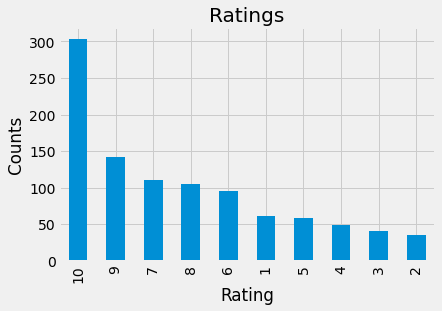

In [ ]:
#df['Rating'].value_counts()

# plot and visualize the count
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Counts')
df['Rating'].value_counts().plot(kind = 'bar')
plt.show()

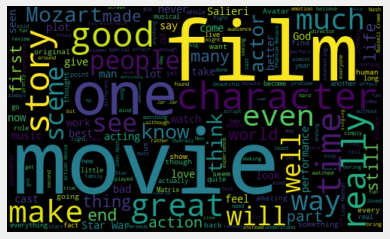

In [ ]:
# Plot Word Cloud

allWords = ' '
for rev in df['Reviews']:
  allWords += rev

wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Print all the positive reviews
sortedDF = df.sort_values(by=['Polarity_generated'])
j = 1
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) , ')' ,sortedDF['Reviews'][i])
    print()
    j += 1

Streaming output truncated to the last 5000 lines.

167 )  What if you saw things that weren't there? Met people that didn't exist? Went through life not knowing what is real? Sadly, that is the case for real life doctor, John Nash. He has schizophrenia. But he doesn't know it yet. He is a brilliant mathematician who is socially awkward and doesn't like people. The few people he does like are his roommate Charles and his boss Parcher. The problem is, they may be imaginary. When his wife tells him that he has delusions, he doesn't believe it and will stop at nothing to prove that he is right. Russell Crowe plays a very convincing schizophrenic and does a great job portraying this horribly troubled doctor at various stages in his life. I love movies that are based on true stories, such as this one, and what makes them even better is if they are inspirational, such as this one. It is indeed a beautiful movie and one that demands multiple viewings. 

168 )  Sylvia Nasar does a superb job o

In [ ]:
positive_reviews = df[df.Analysis == 'Positive']
positive_reviews = positive_reviews['Reviews']

print("PERCENTAGE OF POSITIVE REVIEWS:", round((positive_reviews.shape[0] / df.shape[0]) * 100, 1))

PERCENTAGE OF POSITIVE REVIEWS: 90.2


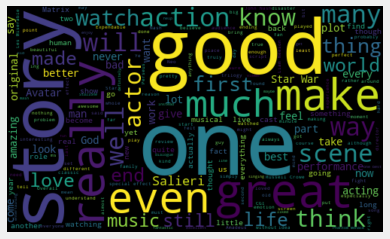

In [ ]:
allPositiveWords = ' '
for rev in positive_reviews:
  allPositiveWords += rev

allPositiveWords = allPositiveWords.replace('film', '')
allPositiveWords = allPositiveWords.replace('movie', '')
allPositiveWords = allPositiveWords.replace('see', '')
allPositiveWords = allPositiveWords.replace('Mozart', '')
allPositiveWords = allPositiveWords.replace('people', '')
allPositiveWords = allPositiveWords.replace('character', '')
allPositiveWords = allPositiveWords.replace('time', '')

wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allPositiveWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Print all the negative reviews
sortedDF = df.sort_values(by=['Polarity_generated'], ascending=False)
j = 1
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) , ')' ,sortedDF['Reviews'][i])
    print()
    j += 1

1 )  I like John Cusack. He usually makes some pretty good movies. This movie is a dog. I know movies stretch the imagination, but this one wants you to remove you head and not even think. The physics are just WAAAAAAY to hard to believe. Earthquakes and volcanic eruptions are nowhere near as big as they are in this movie. And its just a stupid plot all together. 

2 ) 2012 starts off with a bang with strange re-occurring events all over the world. The movie focuses on failed writer Jackson Curtis (John Cusack) trying to lead his family to nirvana in a world of disaster. When the global chaos finally arrives, a plethora of cheesy acting and deliberate stunts, failure hits this movie like puberty.

Chiwetel Ejiofor is the only reason you could consider giving this movie any sort of recognition. He portrays an average scientist who partially uncovers the expiration date for humanity. There is plenty of emotion that comes from the actors, but at some points in the film you are LAUGHING at

In [ ]:
# Get the precentage of negative reviews
negative_reviews = df[df.Analysis == 'Negative']
negative_reviews = negative_reviews['Reviews']

print("PERCENTAGE OF NEGATIVE REVIEWS:", round( (negative_reviews.shape[0] / df.shape[0]) * 100, 1))

PERCENTAGE OF NEGATIVE REVIEWS: 9.8


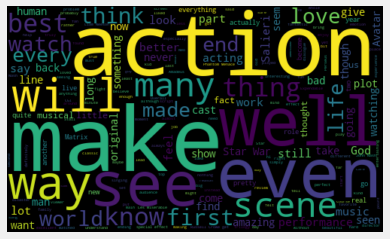

In [ ]:
allNegativeWords = ' '
for rev in positive_reviews:
  allNegativeWords += rev

allNegativeWords = allNegativeWords.replace('film', '')
allNegativeWords = allNegativeWords.replace('movie', '')
allNegativeWords = allNegativeWords.replace('good', '')
allNegativeWords = allNegativeWords.replace('Mozart', '')
allNegativeWords = allNegativeWords.replace('people', '')
allNegativeWords = allNegativeWords.replace('character', '')
allNegativeWords = allNegativeWords.replace('time', '')
allNegativeWords = allNegativeWords.replace('great', '')
allNegativeWords = allNegativeWords.replace('story', '')
allNegativeWords = allNegativeWords.replace('much', '')
allNegativeWords = allNegativeWords.replace('actor', '')
allNegativeWords = allNegativeWords.replace('one', '')
allNegativeWords = allNegativeWords.replace('really', '')

wordCloudNegative = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allNegativeWords)

plt.imshow(wordCloudNegative, interpolation = "bilinear")
plt.axis('off')
plt.show()

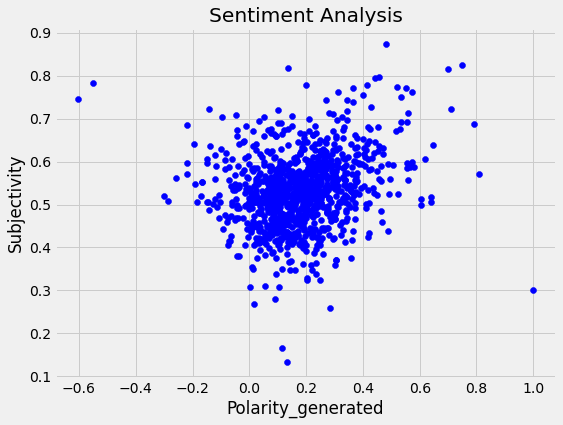

In [ ]:
# Plot the polarity and subjecitivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity_generated'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity_generated')
plt.ylabel('Subjectivity')
plt.show()

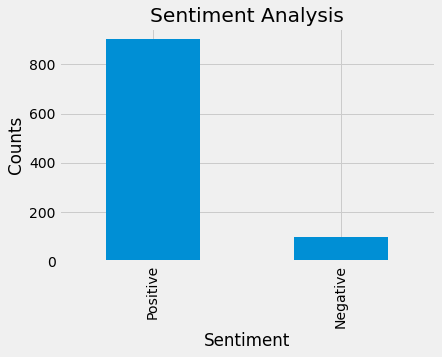

In [ ]:
# Show the value counts

df['Analysis'].value_counts()

# plot and visualize the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# **Logistic regeresion** 
Using sklearn

In [ ]:
# Another data cleaning
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Reviews'] = df['Reviews'].apply(remove_punctuation)
df.head()

# Spliting the data frame
dfNew = df[['Reviews','Sentiment']]
dfNew


,Reviews,Sentiment
0,I have to say this movie is very tense The dis...,1
1,2012 (2009) is a science fiction film disaste...,1
2,I like John Cusack He usually makes some pret...,-1
3,LMAO Are you some kind of boring 90 year old m...,1
4,When I thought about all the hoopla that surro...,1
...,...,...
995,"Picking up right we left in Reloaded, the mach...",1
996,Is Revolutions perfect No Does it come close H...,1
997,"I'm very angry Not at Revolutions, at you You ...",1
998,"As the trilogy came to an close, the viewers w...",1


In [ ]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

# Creating BAG OF WORDS
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Reviews'])
test_matrix = vectorizer.transform(test['Reviews'])

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

# fit model on data and make predictions
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.15      0.60      0.24         5
           1       0.99      0.91      0.95       191

    accuracy                           0.90       196
   macro avg       0.57      0.76      0.59       196
weighted avg       0.97      0.90      0.93       196



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#**Deep learning**
Using torch

In [ ]:
!pip install transformers
!pip install fast_ml==3.68
!pip install datasets

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
from fast_ml.model_development import train_valid_test_split
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch import nn
from torch.nn.functional import softmax
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import datasets

# Spliting the data frame again
dfNew = df[['Reviews','Sentiment']]

# Encoding
le = LabelEncoder()   
dfNew['Sentiment'] = le.fit_transform(dfNew['Sentiment']) # <--- Not sure if I need it right now
print(dfNew.head())

# We have two classes -1(Negative) and 1(Positive)
print("\nClasses:", le.classes_)

(train_texts, train_labels, val_texts, val_labels, test_texts, test_labels) = train_valid_test_split(dfNew, target = 'Sentiment', train_size=0.8, valid_size=0.1, test_size=0.1)

train_texts = train_texts['Reviews'].to_list()
train_labels = train_labels.to_list()
val_texts = val_texts['Reviews'].to_list()
val_labels = val_labels.to_list()
test_texts = test_texts['Reviews'].to_list()
test_labels = test_labels.to_list()

#print(train_texts)


                                             Reviews  Sentiment
0  I have to say this movie is very tense. The di...          1
1   2012 (2009) is a science fiction film disaste...          1
2   I like John Cusack. He usually makes some pre...          0
3  LMAO!!!!! Are you some kind of boring 90 year ...          1
4  When I thought about all the hoopla that surro...          1

Classes: ['-1' '1']


**Data Loader** - initializes a pretrained tokenizer and encodes the input sentences. We can get a single record from the DataLoader by using the __getitem__ function. Below is the result after an input sentence is tokenized.



> The output data is a dictionary consisting of 3 keys-value pairs:
    **input_ids**,
   **attention_mask**,
    **labels**



In [ ]:
# Class for processing and loading of the data during training and inference phase

class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        
        if bool(sentences):
            self.encodings = self.tokenizer(self.sentences,
                                            truncation = True,
                                            padding = True)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        
        if self.labels == None:
            item['labels'] = None
        else:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
        return self.tokenizer(x, return_tensors = 'pt').to(DEVICE)

train_dataset = DataLoader(train_texts, train_labels)
val_dataset = DataLoader(val_texts, val_labels)
test_dataset = DataLoader(test_texts, test_labels)

print (train_dataset.__getitem__(0))

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.16.2",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

{'input_ids': tensor([  101,  1045,  9826,  2123,  1005,  1056,  2131,  2339,  2111,  2360,
         2023,  2003,  1037,  2919,  3185,  1012,  1045,  2228,  2009,  1005,
         1055,  3243, 22249,  1012,  1045,  2812,  1010,  1045,  2123,  1005,
         1056,  2293,  2009,  1010,  2021,  2009,  2003,  1037,  2843,  2488,
         2084,  2116,  7071,  5691,  2077,  2023,  1012,  1998,  2043,  2009,
         3310,  2000,  7071,  5691,  1010,  2017,  2123,  1005,  1056,  2031,
         1037,  2843,  1997,  3601,  1012,  4983,  2009,  1005,  1055,  2074,
         2028,  7071,  1010,  2066,  9792,  2121,  1012,  2023,  2003,  2028,
         1997,  1996,  2069,  7071,  5691,  2008,  1045,  2428,  5959,  2008,
         2038,  2195,  2367,  6991,  1012, 17932,  1010, 23694,  9413, 29441,
         2075,  1010, 15065,  5975,  1010,  1998,  2060,  2428,  4658,  3019,
        18665,  2008,  2111,  2293,  3666,  2021,  2052,  2196,  2215,  2009,
         2000,  2428,  4148,  1012,  1999,  2023, 

In [ ]:
# Evaluation metrics

f1 = datasets.load_metric('f1')
accuracy = datasets.load_metric('accuracy')
precision = datasets.load_metric('precision')
recall = datasets.load_metric('recall')
def compute_metrics(eval_pred):
    metrics_dict = {}
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    metrics_dict.update(f1.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(accuracy.compute(predictions = predictions, references = labels))
    metrics_dict.update(precision.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(recall.compute(predictions = predictions, references = labels, average = 'macro'))
    return metrics_dict

In [ ]:
# Training
id2label = {idx:label for idx, label in enumerate(le.classes_)}
label2id = {label:idx for idx, label in enumerate(le.classes_)}
config = AutoConfig.from_pretrained('distilbert-base-uncased',
                                    num_labels = 2,
                                    id2label = id2label,
                                    label2id = label2id)
model = AutoModelForSequenceClassification.from_config(config)

print("\n--------------------------CONFIG--------------------------")
print (config)
print("\n--------------------------MODEL--------------------------")
print (model)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "-1",
    "1": "1"
  },
  "initializer_range": 0.02,
  "label2id": {
    "-1": 0,
    "1": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.16.2",
  "vocab_size": 30522
}




--------------------------CONFIG--------------------------
DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "-1",
    "1": "1"
  },
  "initializer_range": 0.02,
  "label2id": {
    "-1": 0,
    "1": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.16.2",
  "vocab_size": 30522
}


--------------------------MODEL--------------------------
DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,

In [ ]:
# Setting up training arguments
training_args = TrainingArguments(
    output_dir='/kaggle/working/results',
    num_train_epochs=1,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    warmup_steps=500,
    weight_decay=0.05,
    report_to='none',
    evaluation_strategy='steps',
    logging_dir='/kagge/working/logs',
    logging_steps=50)

#Instantiate the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics)

trainer.train()

using `logging_steps` to initialize `eval_steps` to 50
PyTorch: setting up devices
***** Running training *****
  Num examples = 800
  Num Epochs = 1
  Instantaneous batch size per device = 5
  Total train batch size (w. parallel, distributed & accumulation) = 5
  Gradient Accumulation steps = 1
  Total optimization steps = 160


Step,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
50,0.401500,0.296703,0.481865,0.930000,0.465000,0.500000


***** Running Evaluation *****
  Num examples = 100
  Batch size = 5


**EVALUATION**

In [ ]:
# Evaluation
eval_results = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 100
  Batch size = 5


In [ ]:
print("\n================================== PREDICTIONS ===========================================================================\n")
print (eval_results.predictions)
print("\n================================== LABELS ===========================================================================\n")
print (eval_results.label_ids)
print("\n================================== METRICS ===========================================================================\n")
print (eval_results.metrics)

# Normalization
label2id_mapper = model.config.id2label
proba = softmax(torch.from_numpy(eval_results.predictions))
pred = [label2id_mapper[i] for i in torch.argmax(proba, dim = -1).numpy()]
actual = [label2id_mapper[i] for i in eval_results.label_ids]
class_report = classification_report(actual, pred, output_dict = True)
pd.DataFrame(class_report)

# Saving model
trainer.save_model('/kaggle/working/sentiment_model')

Saving model checkpoint to /kaggle/working/sentiment_model
Configuration saved in /kaggle/working/sentiment_model/config.json



================================== PREDICTIONS ===========================================================================

[[-1.9107559  2.1533835]
 [-1.889314   2.1434274]
 [-1.8882413  2.1429627]
 [-1.8816624  2.120009 ]
 [-1.8548298  2.116813 ]
 [-1.9035711  2.1528852]
 [-1.8685458  2.135036 ]
 [-1.9047942  2.1456108]
 [-1.9069474  2.153531 ]
 [-1.8647807  2.1026957]
 [-1.8803188  2.1303718]
 [-1.915426   2.1406603]
 [-1.8716274  2.1362872]
 [-1.890014   2.1220324]
 [-1.9184997  2.1581821]
 [-1.8712523  2.104956 ]
 [-1.8475434  2.0849884]
 [-1.9142321  2.1519291]
 [-1.8796079  2.1253898]
 [-1.8919009  2.1335304]
 [-1.8568611  2.119719 ]
 [-1.89187    2.1494346]
 [-1.8763428  2.1335237]
 [-1.8679485  2.102427 ]
 [-1.9084914  2.1486201]
 [-1.8977411  2.1334586]
 [-1.8827362  2.128995 ]
 [-1.9149932  2.147025 ]
 [-1.8886067  2.122242 ]
 [-1.8908288  2.1351995]
 [-1.9014797  2.149801 ]
 [-1.8850752  2.0934715]
 [-1.8754427  2.1275067]
 [-1.9091618  2.1451404]
 [-1.8935583  2.1248841]


Model weights saved in /kaggle/working/sentiment_model/pytorch_model.bin


# **Emotional word vectors**
Using tensorflow

In [ ]:
pip install text2emotion

In [ ]:
import text2emotion as te
movie = reviews[1]
print(movie)
emotional_dict = te.get_emotion(movie)
print(emotional_dict)
vector = []
vector.append(emotional_dict.get('Happy'))
vector.append(emotional_dict.get('Angry'))
vector.append(emotional_dict.get('Surprise'))
vector.append(emotional_dict.get('Sad'))
vector.append(emotional_dict.get('Fear'))
print(vector)

 2012 (2009) is a science fiction film disaster that was released on 13 November 2009. Telling about the mayan prediction that will predict the earth will experience devastating disaster on December 21, 2009. Jackson frustrated man rescues his family from the catastrophic catastrophe that destroyed the whole world. Very good disaster movie. Stunning CGI effects. Excellent acting ... Forget about the story .. Enjoy 
{'Happy': 0.17, 'Angry': 0.11, 'Surprise': 0.22, 'Sad': 0.33, 'Fear': 0.17}
[0.17, 0.11, 0.22, 0.33, 0.17]


In [ ]:
list_emotional_vectors = []
for movie in reviews:
  emotional_dict = te.get_emotion(movie)
  vector = []
  vector.append(emotional_dict.get('Happy'))
  vector.append(emotional_dict.get('Angry'))
  vector.append(emotional_dict.get('Surprise'))
  vector.append(emotional_dict.get('Sad'))
  vector.append(emotional_dict.get('Fear'))
  list_emotional_vectors.append(vector)

for i in range(10):
  print("----------------------------------------------")
  print(reviews[i])
  print(list_emotional_vectors[i])

# print(reviews[:3])
# print(list_emotional_vectors[:3])

----------------------------------------------
I have to say this movie is very tense. The disasters in it make you think, will the world really end this way? It's one of those films where it gets your mind thinking about the world around us and how natural disasters can and will happen.

The reason I give 2012 a 9 is it is a film where it makes you think, it makes you think about being prepared for disasters great or small, basically it's a movie about reality but its fiction. Don't get me wrong it was a great movie, a real edge of your seat type of deal. For one the natural disasters in the film can happen anytime, for example, the yellow stone caldera is a real super volcano that scientists and geologist have been studying. They do say it will erupt again in the future, but they don't know when? as for the earthquakes those are real, the shifting of continents? I guess a major event like that can happen? It did millions of years ago.

I for one liked the action in it, I also liked t

In [ ]:
for i in range(10):
  print("----------------------------------------------")
  print(reviews[i])
  print(list_emotional_vectors[i])

----------------------------------------------
I have to say this movie is very tense. The disasters in it make you think, will the world really end this way? It's one of those films where it gets your mind thinking about the world around us and how natural disasters can and will happen.

The reason I give 2012 a 9 is it is a film where it makes you think, it makes you think about being prepared for disasters great or small, basically it's a movie about reality but its fiction. Don't get me wrong it was a great movie, a real edge of your seat type of deal. For one the natural disasters in the film can happen anytime, for example, the yellow stone caldera is a real super volcano that scientists and geologist have been studying. They do say it will erupt again in the future, but they don't know when? as for the earthquakes those are real, the shifting of continents? I guess a major event like that can happen? It did millions of years ago.

I for one liked the action in it, I also liked t

In [ ]:
# Turning ratings in integer
ratings_int = []
for i in range(len(ratings)):
  ratings_int.append([int(ratings[i])])
ratings_numpy=np.array(ratings_int)
print(ratings_numpy[:3])

# Turning ratings in integer
polaritys_int = []
for i in range(len(polaritys)):
  polaritys_int.append([int(polaritys[i])])
polaritys_numpy=np.array(polaritys_int)
print(polaritys_numpy[:3])

[[ 9]
 [10]
 [ 3]]
[[1]
 [1]
 [0]]


In [ ]:
# Train, Test sets for ratings
import random
x_test = []
x_train = []
y_test = []
y_train = []

for i in range(len(list_emotional_vectors)):
  movie = list_emotional_vectors[i]
  rating = ratings_numpy[i]
  random_number = random.uniform(0,1)
  if random_number <= 0.20:
    x_test.append(movie)
    y_test.append(rating)
  else:
    x_train.append(movie)
    y_train.append(rating)

x_test_numpy=np.array(x_test)
partial_x_train_numpy = np.array(x_train)
y_test_numpy=np.array(y_test)
partial_y_train_numpy = np.array(y_train)

print(len(x_test_numpy))
print(len(partial_x_train_numpy))
print(len(y_test_numpy))
print(len(partial_y_train_numpy))
print(x_test_numpy[:3])
print(y_test_numpy[:3])

215
785
215
785
[[0.14 0.05 0.16 0.37 0.28]
 [0.04 0.   0.33 0.25 0.38]
 [0.08 0.   0.57 0.16 0.19]]
[[10]
 [ 1]
 [ 7]]


In [ ]:
# Train, Test sets for polarity
import random
x_test = []
x_train = []
y_test = []
y_train = []

for i in range(len(list_emotional_vectors)):
  movie = list_emotional_vectors[i]
  rating = polaritys_numpy[i]
  random_number = random.uniform(0,1)
  if random_number <= 0.20:
    x_test.append(movie)
    y_test.append(rating)
  else:
    x_train.append(movie)
    y_train.append(rating)

x_test_numpy=np.array(x_test)
partial_x_train_numpy = np.array(x_train)
y_test_numpy=np.array(y_test)
partial_y_train_numpy = np.array(y_train)

print(len(x_test_numpy))
print(len(partial_x_train_numpy))
print(len(y_test_numpy))
print(len(partial_y_train_numpy))
print(x_test_numpy[:3])
print(y_test_numpy[:3])

194
806
194
806
[[0.09 0.   0.41 0.09 0.41]
 [0.23 0.08 0.08 0.23 0.38]
 [0.07 0.   0.3  0.33 0.3 ]]
[[1]
 [1]
 [1]]


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(partial_x_train_numpy, partial_y_train_numpy, epochs=400, verbose=0)
loss, accuracy = model.evaluate(x_test_numpy, y_test_numpy, verbose=0)

print(model.summary())

print('Accuracy: %f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 16)                80        
                                                                 
 dense_14 (Dense)            (None, 32)                544       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 11)                99        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-traina